### File to analyze the self created dataset

In [1]:
from src.data.dataloader import VesselCaptureDataset
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

# Set font and fontsize globally
matplotlib.rcParams['font.family'] = 'Arial'
matplotlib.rcParams['font.size'] = 11


In [2]:
data_dir = "data/processed"
dataset = VesselCaptureDataset(data_dir)

In [3]:
print("Number of samples:", len(dataset))

Number of samples: 5451


In [4]:
data_loader = DataLoader(dataset, batch_size=1, shuffle=True)

Average vessel volume: 400.22
Average liquid volume: 184.10


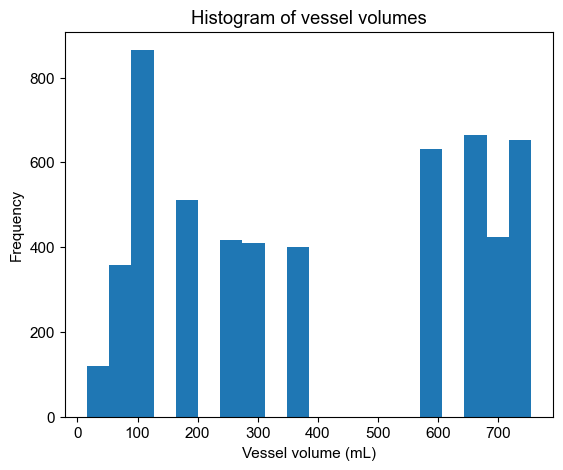

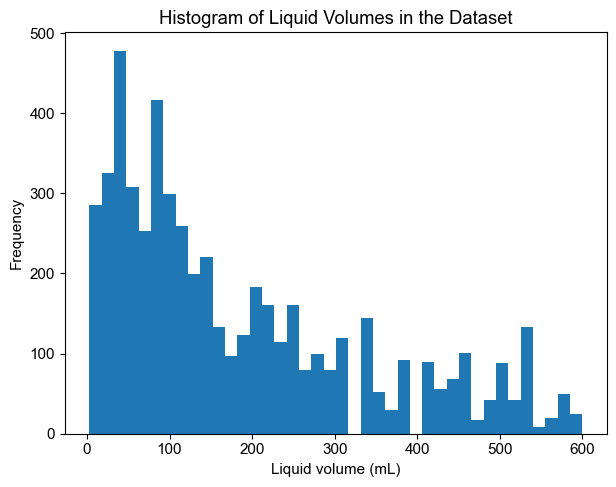

In [5]:
# get average of all vessel volumes
vessel_vol_sum = 0
liquid_vol_sum = 0
vessel_vol_list = []
liquid_vol_list = []

for i, data in enumerate(data_loader):
    vessel_vol = data["vol_vessel"]
    # store value for each sample for histogram
    vessel_vol_list.append(vessel_vol.item())
    vessel_vol_sum += vessel_vol.item()
    liquid_vol = data["vol_liquid"]
    # store value for each sample for histogram
    liquid_vol_list.append(liquid_vol.item())
    liquid_vol_sum += liquid_vol.item()

vessel_vol_avg = vessel_vol_sum/len(dataset)
liquid_vol_avg = liquid_vol_sum/len(dataset)

# print results with 2 decimal places
print("Average vessel volume:", "{:.2f}".format(vessel_vol_avg))
print("Average liquid volume:", "{:.2f}".format(liquid_vol_avg))

# plot histogram of vessel volumes
plt.figure(figsize=(6.3, 5))
plt.hist(vessel_vol_list, bins=20)
plt.title("Histogram of vessel volumes")
plt.xlabel("Vessel volume (mL)")
plt.ylabel("Frequency")
plt.show()

# plot histogram of liquid volumes
plt.figure(figsize=(6.3, 5))
plt.hist(liquid_vol_list, bins=40)
plt.title("Histogram of Liquid Volumes in the Dataset")
plt.xlabel("Liquid volume (mL)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("output/histogram_liquid_volume.png", format="png", dpi=600)
plt.show()

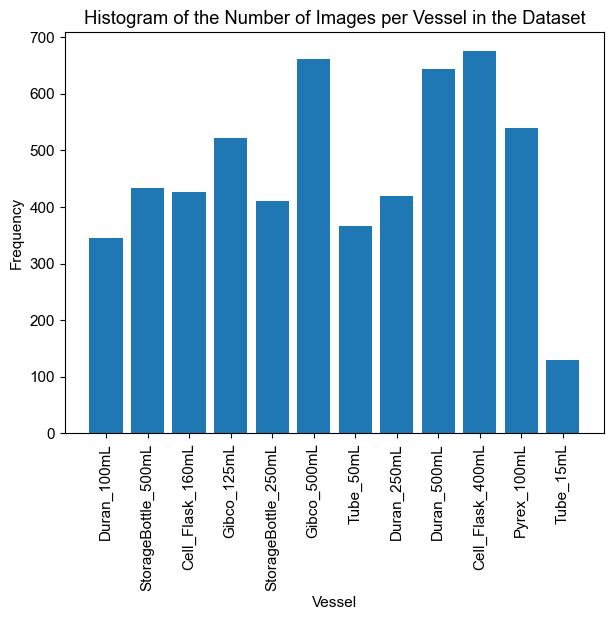

In [92]:
from collections import Counter

vessel_names = []
for i, data in enumerate(data_loader):
    vessel_name = data["vessel_name"]
    vessel_names.append(str(vessel_name))
    #print(vessel_names)

# Count the occurrences of each vessel name
name_counts = Counter(vessel_names)

# Extract unique vessel names and their counts
unique_vessel_names = [name[2:-2] for name in name_counts.keys()]  # Remove brackets and quotes
vessel_name_counts = list(name_counts.values())

# Plot histogram of vessel names
# bar without brackets for names
plt.figure(figsize=(6.3, 5))
plt.bar(unique_vessel_names, vessel_name_counts)
plt.title("Histogram of the Number of Images per Vessel in the Dataset")
plt.xlabel("Vessel")
plt.ylabel("Frequency")
plt.tight_layout()
plt.xticks(rotation=90)
plt.savefig("output/histogram_vessel_names.png", format="png", dpi=1200)
plt.show()

In [93]:
vessel_depth_path = "data/processed/Gibco_500mL_358ml_1105_2306/Input_EmptyVessel_Depth_segmented.npy"
vessel_depth = np.load(vessel_depth_path).astype(np.float32)

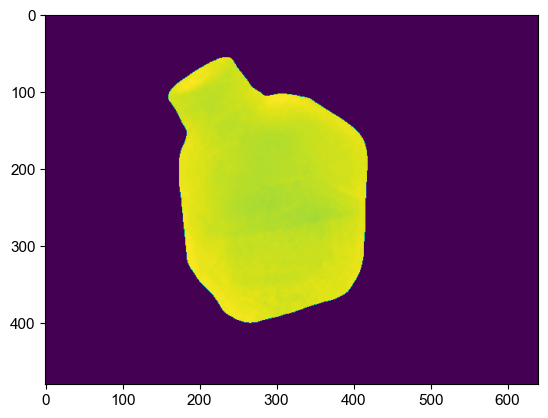

In [94]:
# visualize vessel depth image
plt.imshow(vessel_depth)

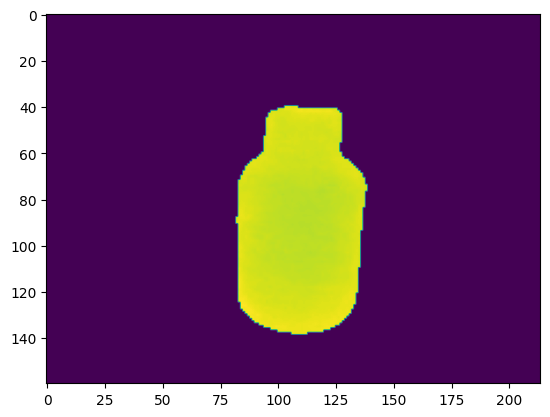

In [33]:
# resize vessel depth image
#vessel_depth = vessel_depth[::3, ::3]

# visualize resized vessel depth image
#plt.imshow(vessel_depth)

In [19]:
# find mean of all vessel depth images in the dataset
vessel_depth_sum = 0

for i, data in enumerate(data_loader):
    vessel_depth = data["vessel_depth"]
    vessel_depth_sum += vessel_depth.sum()/vessel_depth.numel()

vessel_depth_avg = vessel_depth_sum/len(dataset)

# calculate std of all vessel depth images in the dataset
vessel_depth_std_sum = 0
for i, data in enumerate(data_loader):
    vessel_depth = data["vessel_depth"]
    vessel_depth_std_sum += (vessel_depth - vessel_depth_avg)**2

vessel_depth_std = (vessel_depth_std_sum/len(dataset))**0.5


# print results with 2 decimal places
print("Average vessel depth:", "{:.2f}".format(vessel_depth_avg))
print("Std of vessel depth:", "{:.2f}".format(vessel_depth_std))

Average vessel depth: 0.12


TypeError: unsupported format string passed to Tensor.__format__

In [17]:
# same for liquid depth
liquid_depth_sum = 0
for i, data in enumerate(data_loader):
    liquid_depth = data["liquid_depth"]
    liquid_depth_sum += liquid_depth.sum()/liquid_depth.numel()

liquid_depth_avg = liquid_depth_sum/len(dataset)

# print results with 2 decimal places
print("Average liquid depth:", "{:.2f}".format(liquid_depth_avg))

Average liquid depth: 0.20


In [35]:
depth_map = np.load("data/processed/StorageBottle_250mL_156mL_1105_3948/Input_DepthMap.npy").astype(np.float32)

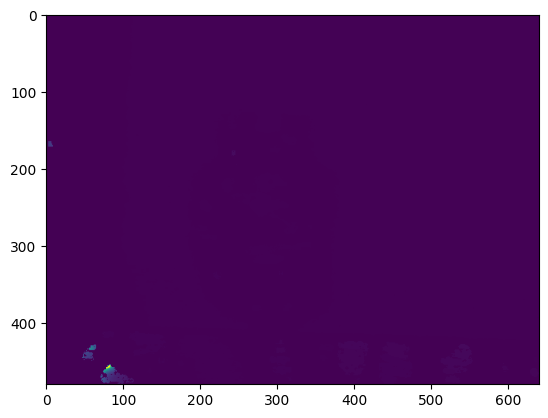

In [36]:
# visualize depth map
plt.imshow(depth_map)

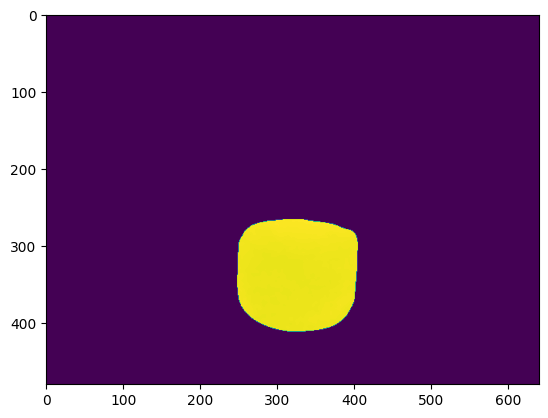

In [76]:
# load content depth map 
content_depth = np.load("data/processed/StorageBottle_250mL_156mL_1105_3948/Input_ContentDepth_segmented.npy").astype(np.float32)

# visualize content depth map
plt.imshow(content_depth)

Text(0.5, 1.0, 'Histogram of content depth values')

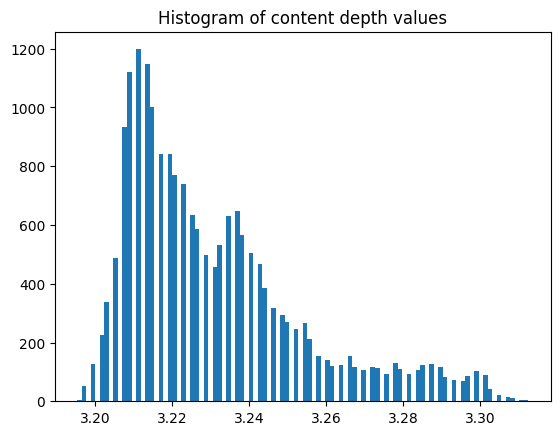

In [56]:
# show histogram of values in depth map ignoring 0 values
plt.hist(content_depth[content_depth != 0].flatten(), bins=100)
plt.title("Histogram of content depth values")

In [57]:
content_depth.mean()

0.21026197

In [63]:
# load segmentation mask for content depth map
content_mask = np.load("data/processed/StorageBottle_250mL_156mL_1105_3948/Input_ContentMaskClean.npy").astype(np.float32)


In [64]:
# multiply depth map with content mask
content_depth_masked = depth_map * content_mask


In [68]:
# calculate mean of masked depth map of non-zero values
content_depth_masked[content_depth_masked != 0].mean()

318.3249

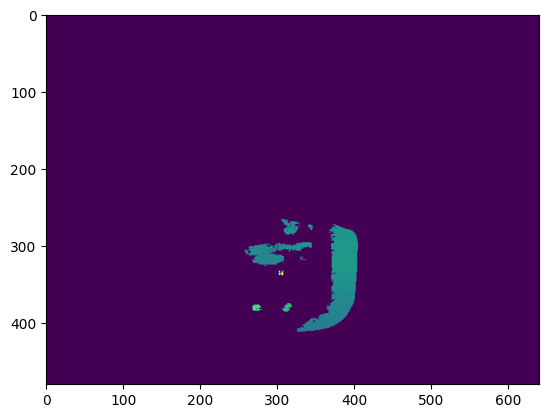

In [67]:
# visualize masked depth map
plt.imshow(content_depth_masked.squeeze())

In [69]:
# load vessel mask
vessel_mask = np.load("data/processed/StorageBottle_250mL_156mL_1105_3948/Input_VesselMask.npy").astype(np.float32)

In [70]:
# multiply depth map with vessel mask
vessel_depth_masked = depth_map * vessel_mask

In [71]:
# calculate mean of masked depth map of non-zero values
vessel_depth_masked[vessel_depth_masked != 0].mean()

320.9654

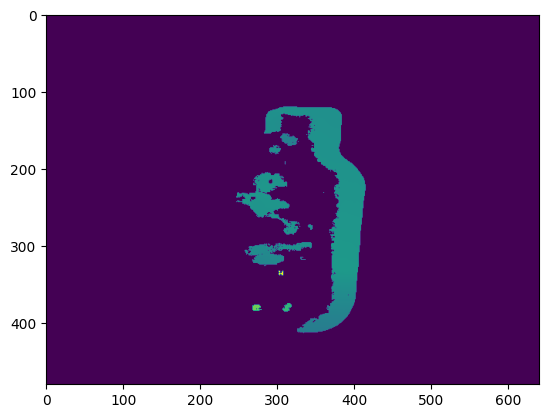

In [72]:
# visualize masked depth map
plt.imshow(vessel_depth_masked.squeeze())

(-0.5, 639.5, 479.5, -0.5)

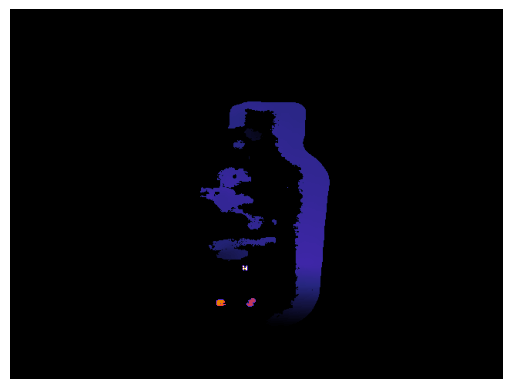

In [73]:
# copy depth map for visualization
tmIm = vessel_depth_masked.copy()
# squeeze depth map
tmIm = tmIm.squeeze()

# normalize tmIm to values between 0-255

# find min and max values for non zero values   
min = tmIm[tmIm != 0].min()
max = tmIm[tmIm != 0].max()

# normalize non zero values to 0-255
tmIm[tmIm != 0] = (tmIm[tmIm != 0] - min) / (max - min) * 255

# visualize depth map
plt.imshow(tmIm, cmap="CMRmap")
# turn off axis
plt.axis("off")


(-0.5, 213.5, 159.5, -0.5)

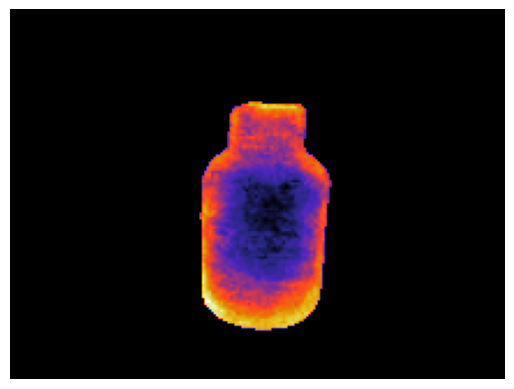

In [74]:
# copy depth map for visualization
tmIm = vessel_depth.copy()
# squeeze depth map
tmIm = tmIm.squeeze()

# normalize tmIm to values between 0-255

# find min and max values for non zero values   
min = tmIm[tmIm != 0].min()
max = tmIm[tmIm != 0].max()

# normalize non zero values to 0-255
tmIm[tmIm != 0] = (tmIm[tmIm != 0] - min) / (max - min) * 255

# visualize depth map
plt.imshow(tmIm, cmap="CMRmap")
# turn off axis
plt.axis("off")

(-0.5, 639.5, 479.5, -0.5)

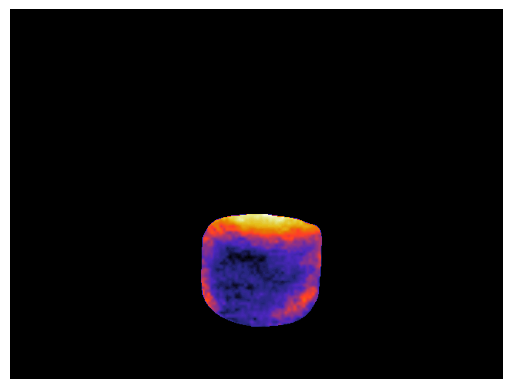

In [77]:
# copy depth map for visualization
tmIm = content_depth.copy()
# squeeze depth map
tmIm = tmIm.squeeze()

# normalize tmIm to values between 0-255

# find min and max values for non zero values   
min = tmIm[tmIm != 0].min()
max = tmIm[tmIm != 0].max()

# normalize non zero values to 0-255
tmIm[tmIm != 0] = (tmIm[tmIm != 0] - min) / (max - min) * 255

# visualize depth map
plt.imshow(tmIm, cmap="CMRmap")
# turn off axis
plt.axis("off")

In [58]:
depth_map.mean()

236.9585

In [59]:
# multiply content depth map with depth map
content_depth = content_depth * depth_map

In [60]:
content_depth.shape

(480, 640)

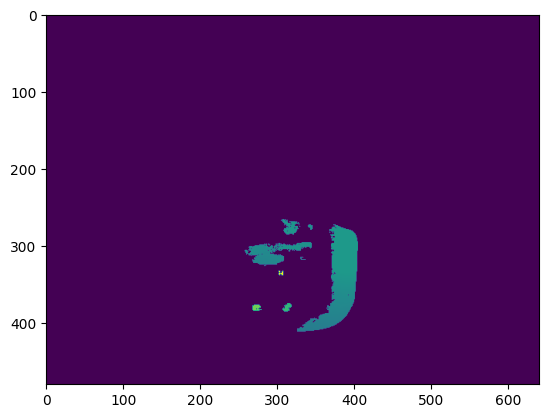

In [61]:
# visualize content depth map
plt.imshow(content_depth)

Text(0.5, 1.0, 'Histogram of content depth values')

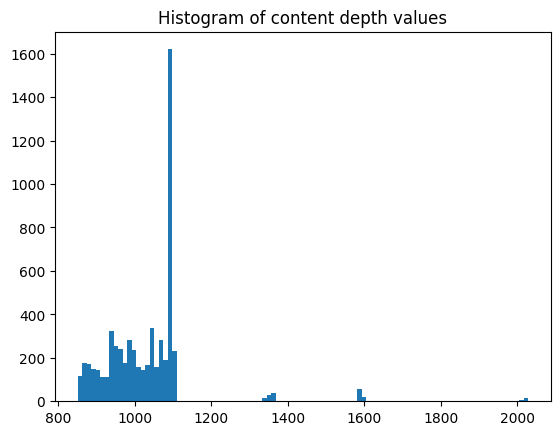

In [62]:
# show histogram of values in depth map ignoring 0 values
plt.hist(content_depth[content_depth != 0].flatten(), bins=100)
plt.title("Histogram of content depth values")